In [1]:
########################################################################
#    June 04, 2019                                                     #
#    09:00                                                             #
#    Created by: Kunal Gehlot                                          #
########################################################################

In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
# from collections import Counter
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
flights = pd.read_csv('flightsNew.csv')

In [3]:
airports = pd.read_csv('airports.csv')

In [4]:
airlines = pd.read_csv('airlines.csv')

In [5]:
airportsData = pd.read_csv('AirportDatabase.csv')

In [6]:
airlinesData = pd.read_csv('AirlineDatabase.csv')

In [7]:
airlinesData = airlinesData.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE')

In [8]:
airlinesData = airlinesData.drop('IATA_CODE', axis = 1)

In [9]:
airlinesData['IATA_CODE'] = airlinesData.AIRLINE_x

In [10]:
airlinesData['AIRLINE_NAME'] = airlinesData.AIRLINE_y

In [11]:
airlinesData = airlinesData.drop('AIRLINE_x', axis = 1)
airlinesData = airlinesData.drop('AIRLINE_y', axis = 1)

In [12]:
airlinesData = airlinesData[['IATA_CODE', 'AIRLINE_NAME', 'AIRLINE_HASH']]

In [13]:
airlinesData = airlinesData.sort_values('IATA_CODE')

In [14]:
airlinesData.to_csv('AirlineDatabase.csv', index=False)

In [15]:
airportsData = airportsData.merge(airports, left_on='AIRPORT', right_on='IATA_CODE')

In [16]:
airportsData = airportsData.drop('AIRPORT_x', axis=1)

In [17]:
airportsData['AIRPORT'] = airportsData.AIRPORT_y

In [18]:
airportsData = airportsData[['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'AIRPORT_HASH', 'LATITUDE', 'LONGITUDE']]

In [19]:
airportData = airportsData.sort_values('IATA_CODE')

In [20]:
airportsData.to_csv('AirportDatabase.csv', index=False)

In [21]:
flights = flights.merge(airportsData, left_on='ORIGIN_AIRPORT', right_on='AIRPORT_HASH', how='left')

In [22]:
flights['ORIGIN_AIRPORT'] = flights.IATA_CODE

In [23]:
flights = flights.merge(airportsData, left_on='DESTINATION_AIRPORT', right_on='AIRPORT_HASH', how='left')

In [24]:
flights['DESTINATION_AIRPORT'] = flights.IATA_CODE_y

In [25]:
flights = flights[['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCH_DEP_HR', 'SCH_DEP_MN',
       'DEP_TM_HR', 'DEP_TM_MN', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHL_OFF_HR',
       'WHL_OFF_MN', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHL_ON_HR', 'WHL_ON_MN', 'TAXI_IN', 'SCH_ARVL_HR', 'SCH_ARVL_MN',
       'ARVL_TM_HR', 'ARVL_TM_MN', 'ARRIVAL_DELAY']]

In [26]:
flights = flights.merge(airlinesData, left_on = 'AIRLINE', right_on = 'AIRLINE_HASH', how='left')

In [27]:
flights.AIRLINE = flights.IATA_CODE

In [28]:
flights = flights[['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCH_DEP_HR', 'SCH_DEP_MN',
       'DEP_TM_HR', 'DEP_TM_MN', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHL_OFF_HR',
       'WHL_OFF_MN', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHL_ON_HR', 'WHL_ON_MN', 'TAXI_IN', 'SCH_ARVL_HR', 'SCH_ARVL_MN',
       'ARVL_TM_HR', 'ARVL_TM_MN', 'ARRIVAL_DELAY']]

In [29]:
flights.to_csv('flights_vis.csv', index=False)

In [2]:
airportsData = pd.read_csv('AirportDatabase.csv')

In [3]:
flights = pd.read_csv('flights_vis.csv')

In [4]:
airlinesData = pd.read_csv('AirlineDatabase.csv')

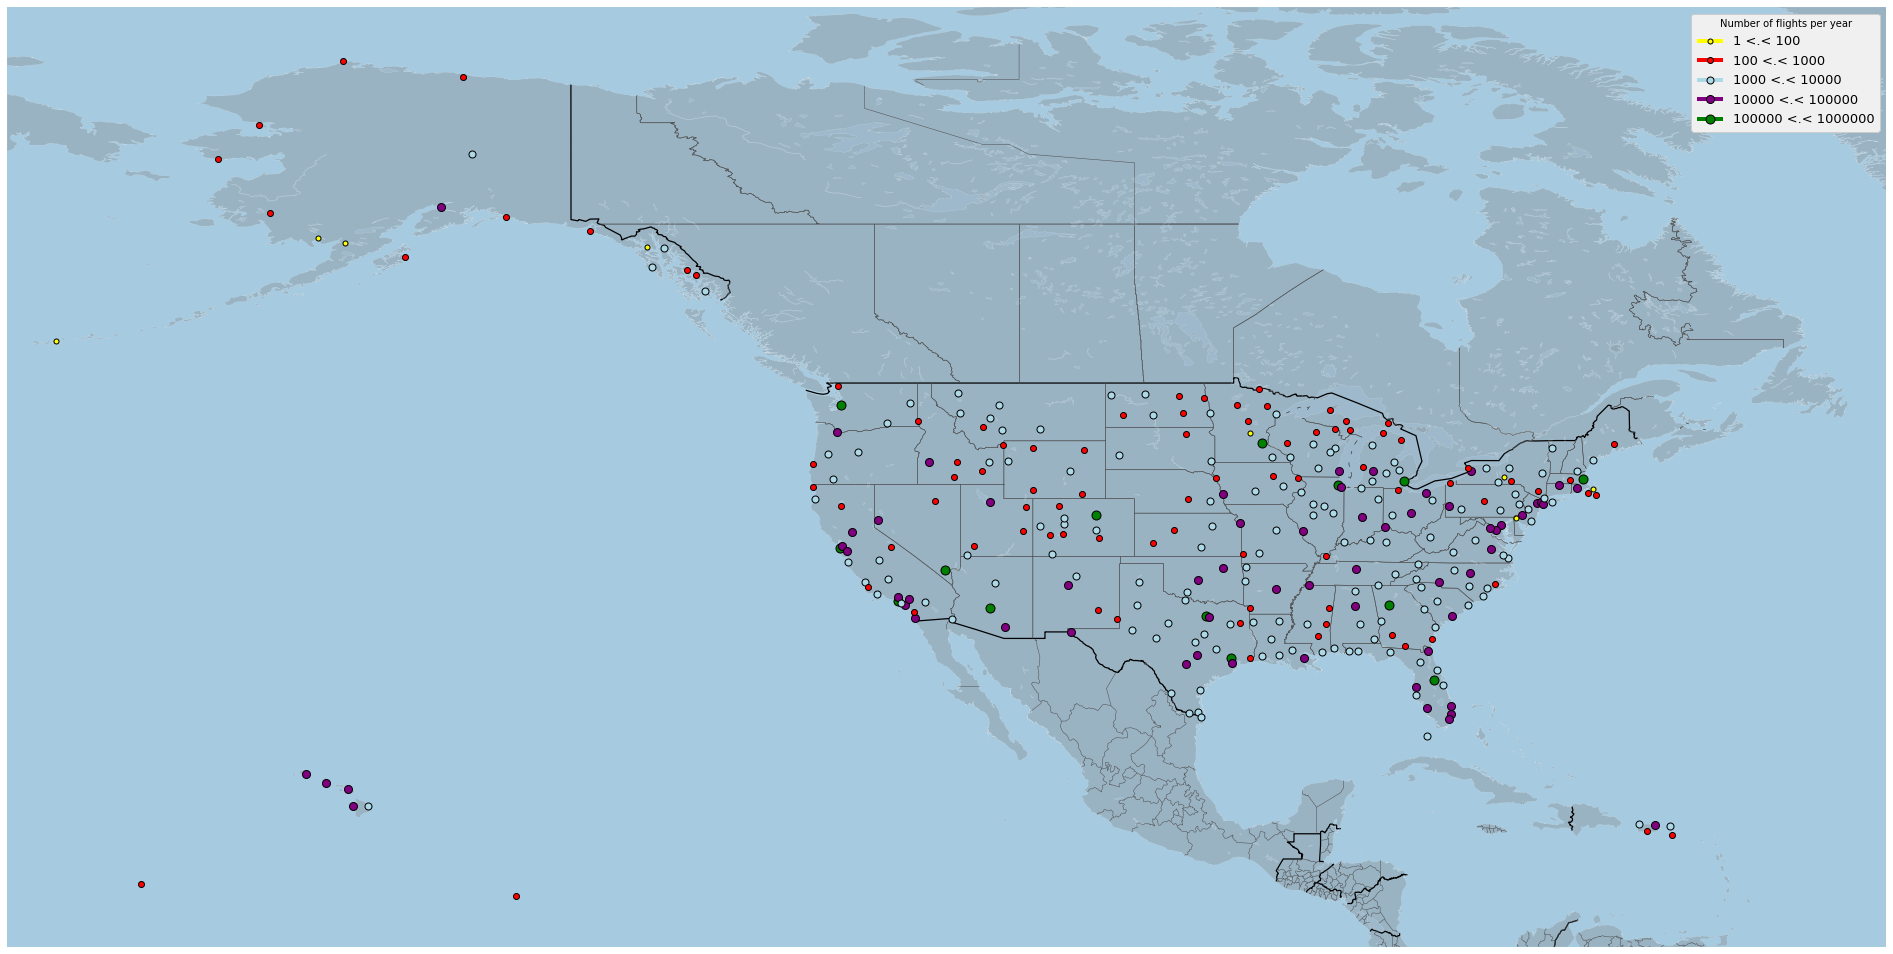

In [33]:
count_flights = flights['ORIGIN_AIRPORT'].value_counts()
plt.figure(figsize=(30,20))

colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']
size_limits = [1, 100, 1000, 10000, 100000, 1000000]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1]))

map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
# map.shadedrelief()
# map.drawcoastlines()
map.drawcountries(linewidth = 1.25)
map.drawstates(color='0.3')
map.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.3)
map.drawcoastlines(linewidth=0.1, color="white")


for index, (code, y,x) in airportsData[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)
    isize = [i for i, val in enumerate(size_limits) if val < count_flights[code]]
    ind = isize[-1]
    map.plot(x, y, marker='o', markersize = ind+5, markeredgewidth = 1, color = colors[ind],
             markeredgecolor='k', label = labels[ind])
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = ('1 <.< 100', '100 <.< 1000', '1000 <.< 10000',
             '10000 <.< 100000', '100000 <.< 1000000')
new_label = OrderedDict()
for key in key_order:
    new_label[key] = by_label[key]
plt.legend(new_label.values(), new_label.keys(), loc = 1, prop= {'size':13},
           title='Number of flights per year', frameon = True, framealpha = 1)

sf = plt.gcf()

plt.show()
sf.savefig('Map.png', format = "png", dpi = 600)

In [5]:
def stats(group):
    return {'Min': group.min(), 'Max': group.max(),
            'Count': group.count(), 'Mean': group.mean()}
flights_stats = pd.DataFrame()
flights_stats = flights['DEPARTURE_DELAY'].groupby(flights['AIRLINE']).apply(stats).unstack()

In [6]:
flights_stats = pd.merge(airlinesData, flights_stats, left_on = 'IATA_CODE', right_on = 'AIRLINE', how = 'inner')#.to_dict()

In [7]:
flights_stats = flights_stats.sort_values('Count')

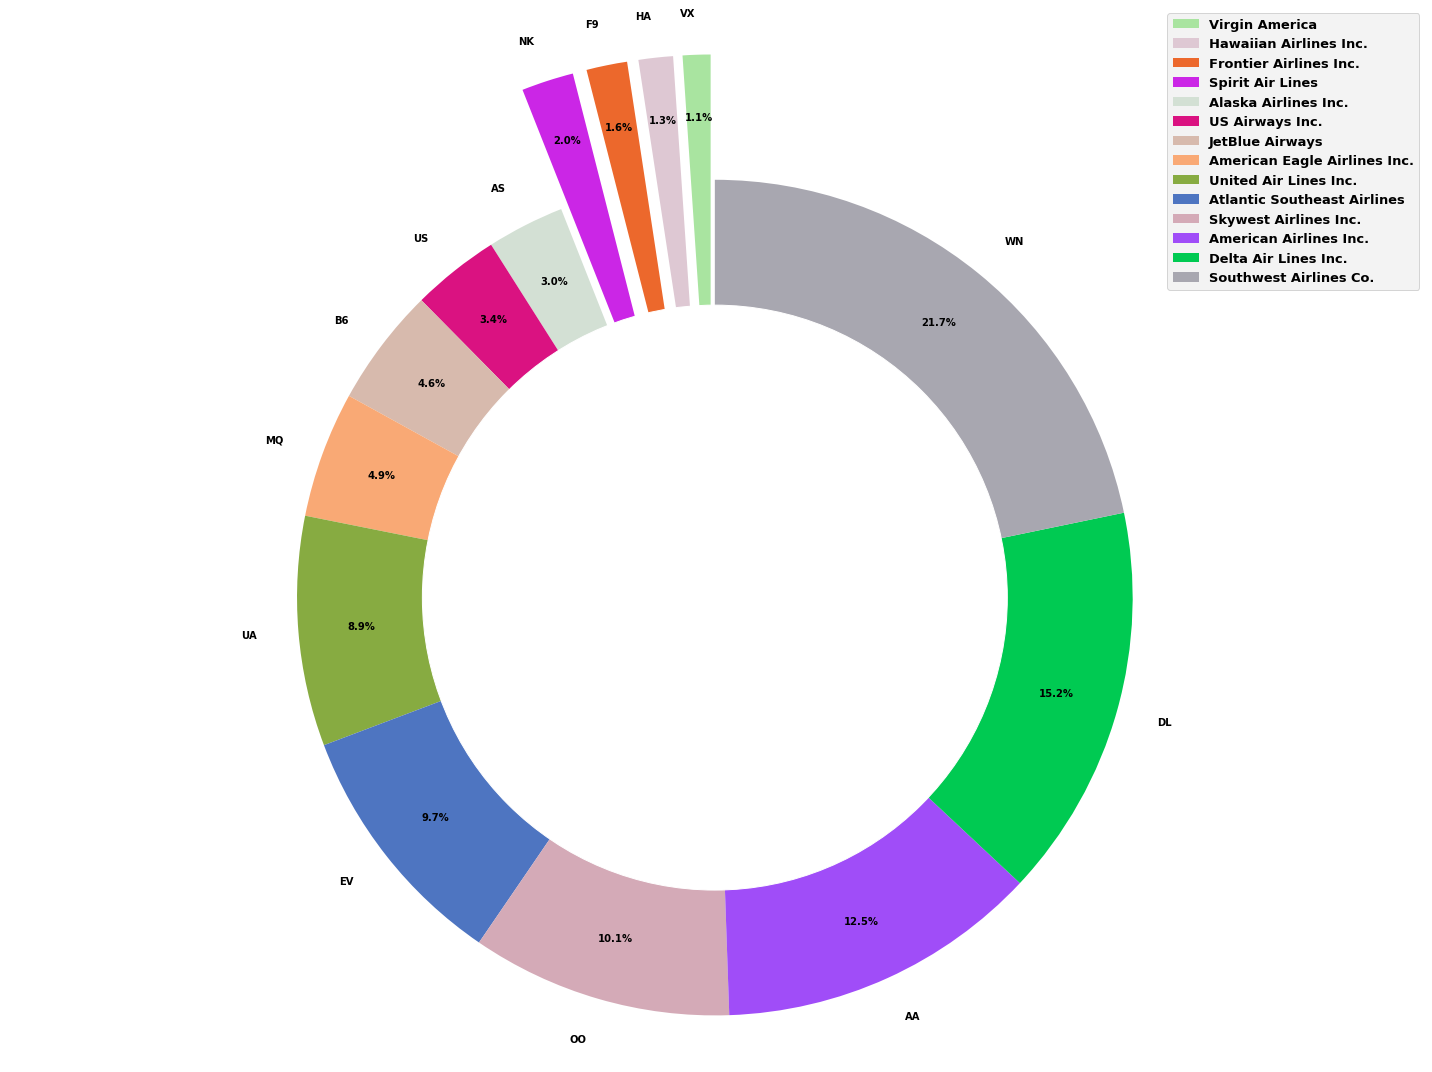

In [37]:
font = {'family' : 'Sans-serif', 'weight' : 'bold', 'size'   : 10}
mpl.rc('font', **font)
COLOR = 'black'

mpl.rcParams['text.color'] = COLOR


labels = flights_stats.IATA_CODE
plt.figure(figsize=(20,15))
sizes = flights_stats.Count
colors = ['#a9e4a0', '#dec8d3', '#ec682c', '#cb26e6', '#d3e0d4', '#da1281', '#d7baad', '#f9a975', '#87ab41', '#4e75c1', '#d4aab7', '#a04df8', '#00ca52', '#a8a7b0']
explode = (0.3,0.3,0.3,0.3,0,0,0,0,0,0,0,0,0,0)

# Plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes,explode=explode, labels=labels, colors=colors,pctdistance = 0.85 ,autopct='%1.1f%%', shadow=False, startangle=90,wedgeprops={'linewidth' : 0})
p=plt.gcf()
p.gca().add_artist(my_circle)
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
plt.legend(flights_stats.AIRLINE_NAME, loc='best', prop={'size' : 13})

sf = plt.gcf()

plt.axis('equal')
plt.tight_layout()
plt.show()
sf.savefig('Donut1.png', dpi=600)

In [8]:
number_of_flights=flights[['ORIGIN_AIRPORT','DESTINATION_AIRPORT']]
number_of_flights=number_of_flights.groupby(['ORIGIN_AIRPORT','DESTINATION_AIRPORT'],as_index=False).size().reset_index()
number_of_flights=number_of_flights[number_of_flights['ORIGIN_AIRPORT'].apply(lambda x: len(list(x))<4)]
number_of_flights=number_of_flights[number_of_flights['DESTINATION_AIRPORT'].apply(lambda x: len(list(x))<4)]

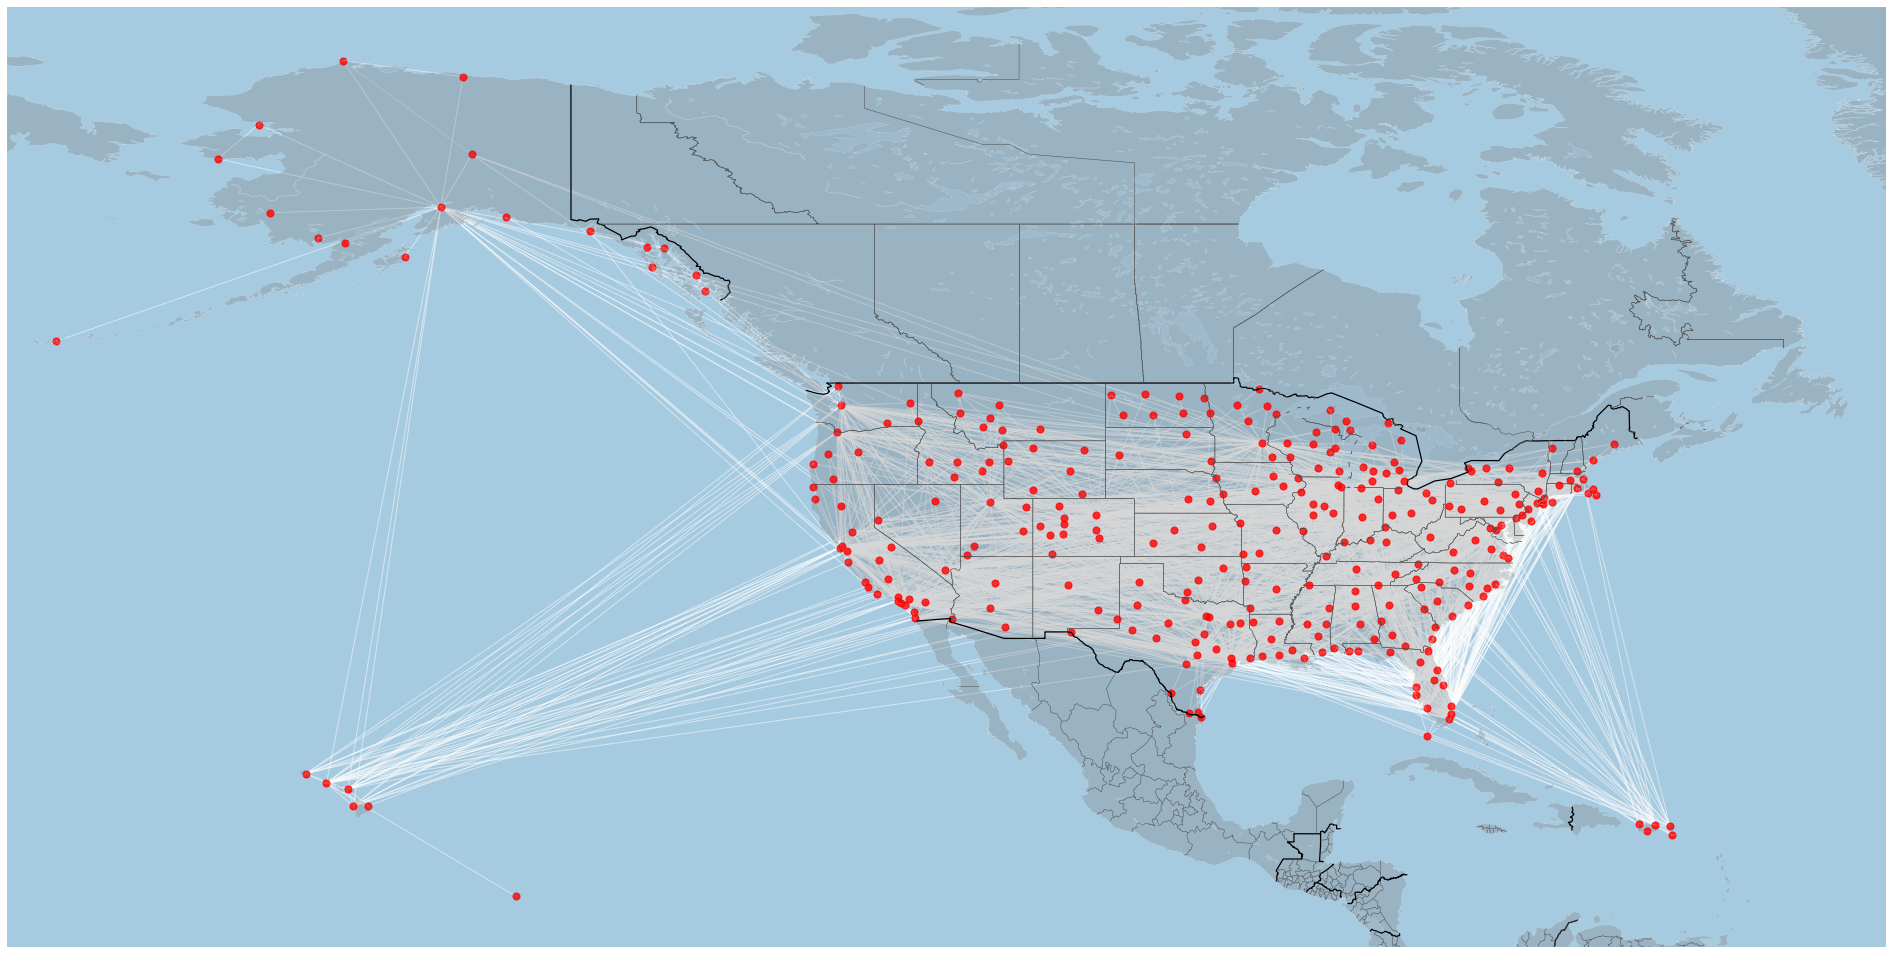

In [39]:
plt.figure(figsize = (30,20))
graph=nx.from_pandas_edgelist(number_of_flights,source ='ORIGIN_AIRPORT',edge_attr=0,target = 'DESTINATION_AIRPORT',create_using = nx.DiGraph())
m = Basemap(resolution = 'i',llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0)

mx, my = m(airportsData['LONGITUDE'].values, airportsData['LATITUDE'].values)
pos = {}
for count, elem in enumerate (airportsData['IATA_CODE']):
     pos[elem] = (mx[count], my[count])

nx.draw_networkx_nodes(G = graph, pos = pos, node_list = graph.nodes(),node_color = 'r', alpha = 0.8, node_size = 50)
nx.draw_networkx_edges(G = graph, pos = pos, edge_color='w', alpha=0.3, arrows = False)
# m.shadedrelief()
# m.drawcoastlines()
m.drawcountries(linewidth = 1.25)
m.drawstates(color='0.3')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

sf = plt.gcf()

plt.show()
sf.savefig('Map2.png', dpi=600)

In [9]:
flights_stats = flights_stats.sort_values('Mean')
flights_stats

,IATA_CODE,AIRLINE_NAME,AIRLINE_HASH,Count,Max,Mean,Min
6,HA,Hawaiian Airlines Inc.,7768625484338907636,76041.0,1433.0,0.469918,-27.0
1,AS,Alaska Airlines Inc.,-8360791546753441282,171439.0,963.0,1.718926,-82.0
11,US,US Airways Inc.,803010445738827812,194223.0,759.0,6.081000,-28.0
3,DL,Delta Air Lines Inc.,-1899816787706439130,870275.0,1289.0,7.313300,-61.0
9,OO,Skywest Airlines Inc.,-3145280092676446643,576814.0,1378.0,7.736083,-56.0
4,EV,Atlantic Southeast Airlines,264633172478902692,554752.0,1236.0,8.615598,-55.0
0,AA,American Airlines Inc.,-6238348016235385132,712935.0,1988.0,8.826106,-68.0
12,VX,Virgin America,-5729983554350992794,61248.0,644.0,8.993486,-24.0
7,MQ,American Eagle Airlines Inc.,155222879185023968,278791.0,1544.0,9.967187,-36.0
13,WN,Southwest Airlines Co.,-460158575914732373,1242403.0,665.0,10.517183,-28.0


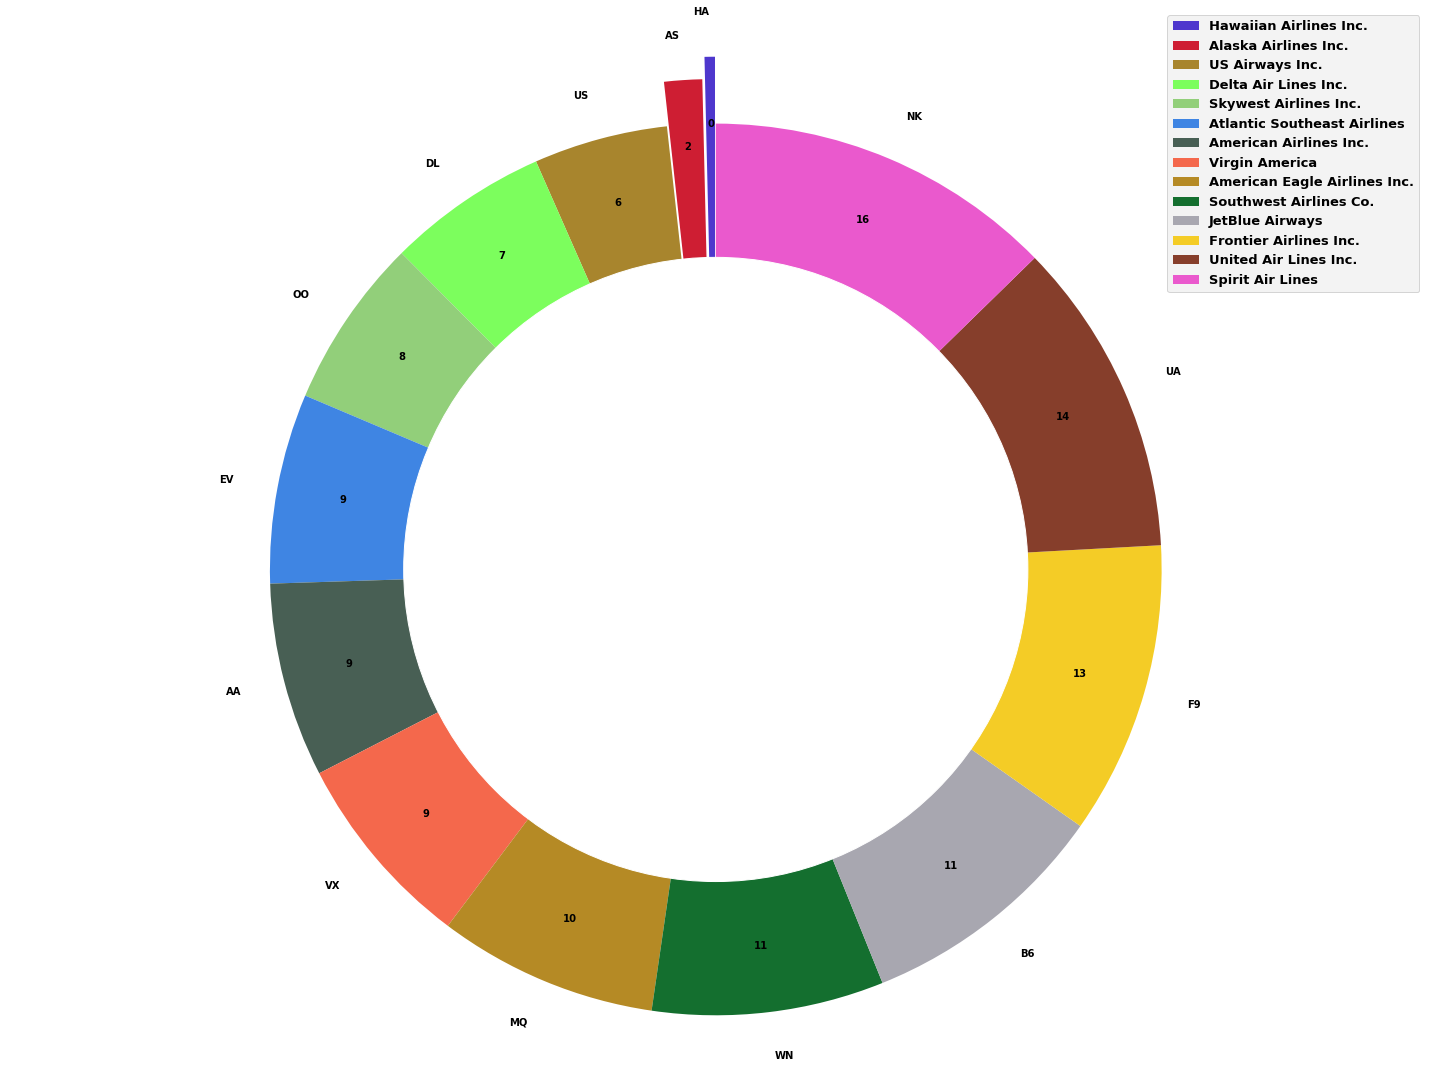

In [41]:
font = {'family' : 'Sans-serif', 'weight' : 'bold', 'size'   : 10}
mpl.rc('font', **font)
COLOR = 'black'

mpl.rcParams['text.color'] = COLOR
plt.figure(figsize=(20,15))

sizes = flights_stats['Mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.15,0.1,0,0,0,0,0,0,0,0,0,0,0,0]
labels = flights_stats.IATA_CODE
colors = ['#4e37cd', '#ce1e33', '#a8852d', '#7cfe5d', '#92cf7a', '#3f85e3', '#485f54', '#f4684c', '#b58a25', '#146f2f', '#a8a7b0', '#f4cc26', '#863e2b', '#ea59cd']


my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(sizes,explode=explode, labels=labels, colors=colors,pctdistance = 0.85 ,autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100), shadow=False, startangle=90,wedgeprops={'linewidth' : 0})
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.legend(flights_stats.AIRLINE_NAME, loc='best', prop={'size' : 13})
plt.axis('equal')
plt.tight_layout()

sf = plt.gcf()

plt.show()
sf.savefig('Donut2.png', dpi=600)


In [10]:
abbr_companies = flights_stats.set_index('IATA_CODE')['AIRLINE_NAME'].to_dict()

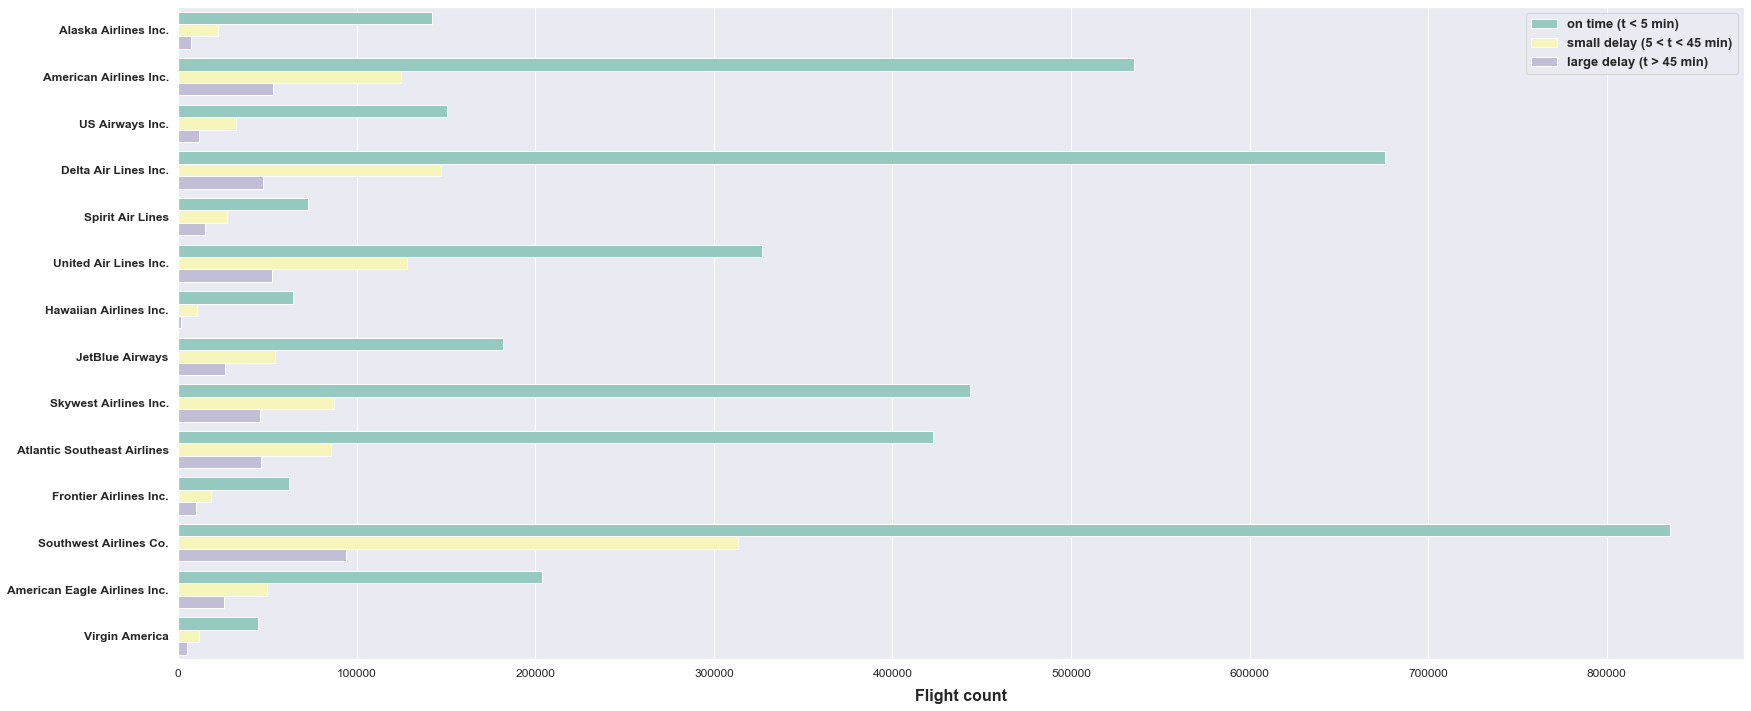

In [44]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
flights['DELAY_LEVEL'] = flights['DEPARTURE_DELAY'].apply(delay_type)
# flights = flights.sort_values('DELAY_LEVEL')
#____________________________________________________
fig = plt.figure(1, figsize=(25,12))
sns.set(style="darkgrid")
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=flights, palette="Set3")
#____________________________________________________________________________________
# We replace the abbreviations by the full names of the companies and set the labels
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend(loc='best', prop={'size' : 13})
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')

sf = plt.gcf()
sf.savefig('Bar.png', dpi = 600)
plt.show()

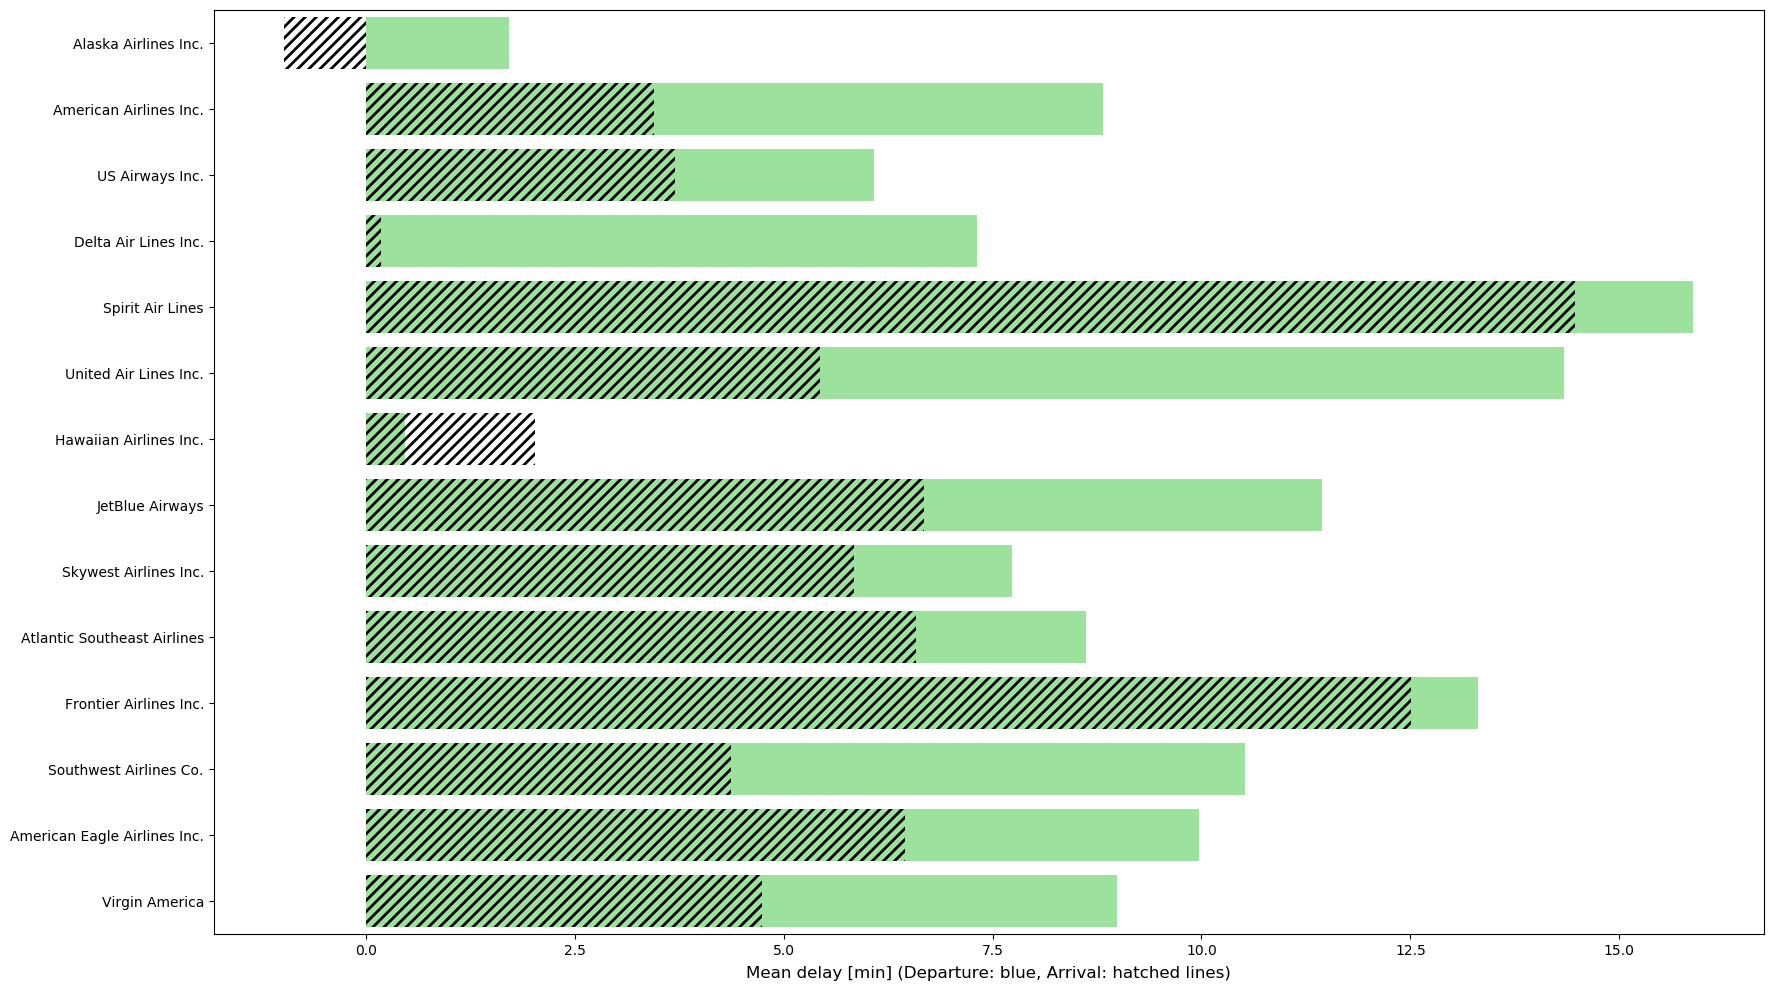

In [14]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(20,12))
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=flights, color="lightgreen", ci=None)
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=flights, color="red", hatch = '///',
                 alpha = 0.0, ci=None)
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel('Mean delay [min] (Departure: blue, Arrival: hatched lines)',
           fontsize=12, labelpad=6);

sf = plt.gcf()
sf.savefig('Bar2.png', dpi=600)
plt.show()